In [1]:
%load_ext autoreload
%autoreload 2

from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")
import os,sys
sys.path.append("../scripts/")
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".8"

import matplotlib.pyplot as plt
import numpy as np
import pickle

from Lyaponuv import  obtain_max_Lyapunov
from network import initialize_RNN as initialise_DMS_RNN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load model

fname = "../results/DMS_18000_22000_2024_07_19_T_07_28_01" 
fname  = "../results/dms_mods_DMS_18000_22000_2024_08_11_T_02_56_32"

params = pickle.load(open(fname +"_params.p", "rb" ))
init_params = pickle.load(open(fname +"_initparams.p", "rb" ))
RNN_params= pickle.load(open(fname +"_config.p", "rb" ))

dt = 0.025
_ = np.random.seed(RNN_params['seed'])
network, init_conn_matrix, init_input_weights=initialise_DMS_RNN(RNN_params)
n_conns = len(np.nonzero(init_conn_matrix)[0])

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


2.58
129
50
conn probability recurrence: 0.0516
EIratio:4.0
Normaliser: 0.5084204281372233
Spectral radius recurrence: 0.0032031662162522252


In [3]:
# Calculate Lyaponuv exponents pre-training

n_models = 1
T = int(5000/dt)
transient=int(5000/dt)
renormalise_interval = 1#10/dt
verbose = False

L,Ls = obtain_max_Lyapunov(network,dt=dt,transient = transient,T=T,QR_t=renormalise_interval, verbose=verbose)


Added 229 recordings. See `.recordings` for details.


In [4]:
print("max Lyapunov exponent", L)

max Lyapunov exponent 0.0036570552654008495


Text(0, 0.5, 'Lyapunov exponent')

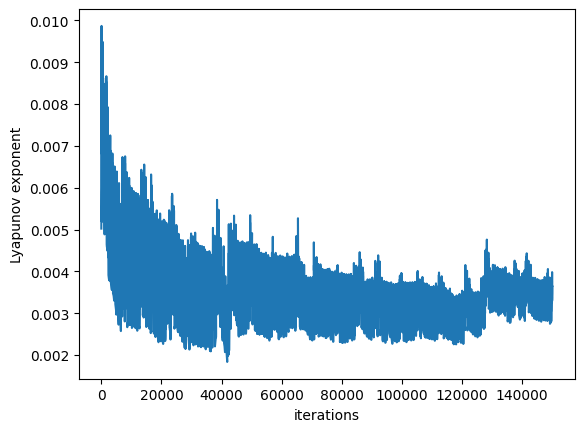

In [5]:
# Check convergence

plt.plot(Ls[50000:])
plt.xlabel("iterations")
plt.ylabel("Lyapunov exponent")

In [6]:
# initialize with trained parameters

network.delete_trainables()

for par in params:
    if "IonotropicSynapse_gS"in par.keys():
        for i, value in enumerate(par['IonotropicSynapse_gS']):
            network.IonotropicSynapse(i).set('IonotropicSynapse_gS', value)

    if "IonotropicSynapse_k_minus" in par.keys():
        for i,value in enumerate(par['IonotropicSynapse_k_minus']):
            network.IonotropicSynapse(i).set('IonotropicSynapse_k_minus', value)



In [7]:
# Calculate exponent of trained model

L,Ls = obtain_max_Lyapunov(network,dt=dt,transient = transient,T=T,QR_t=renormalise_interval, verbose=verbose)


Added 229 recordings. See `.recordings` for details.


In [8]:
print("max Lyapunov exponent", L)

max Lyapunov exponent -3.4806331956144686e-05


Text(0, 0.5, 'Lyapunov exponent')

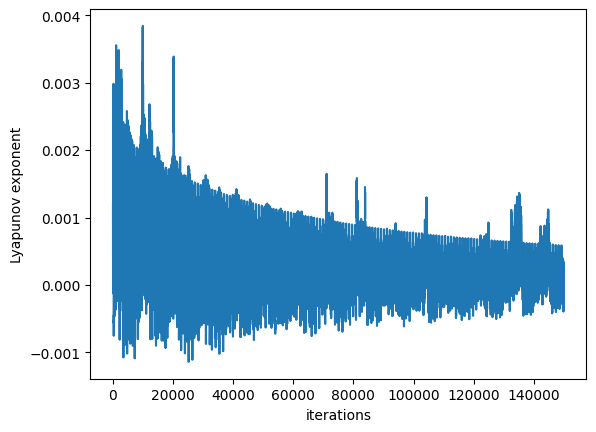

In [9]:
# check convergence
plt.plot(Ls[50000:])
plt.xlabel("iterations")
plt.ylabel("Lyapunov exponent")